<a href="https://colab.research.google.com/github/Prethumnan/Social-network-ads/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})
data.drop(["User ID","Gender"],axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [6]:
x=data.drop("Purchased",axis=1)
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [7]:
scaler=MinMaxScaler()
scaler.fit(x_train)
for i in ["Age","EstimatedSalary"]:
  x_train[[i]]=scaler.fit_transform(x_train[[i]])
scaler.fit(x_test)
for i in ["Age","EstimatedSalary"]:
  x_test[[i]]=scaler.fit_transform(x_test[[i]])

**Fitting SVM to the Training set**

In [8]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [9]:
y_pred=model.predict(x_test)
roc_auc_score(y_test,y_pred)

0.8482905982905982

**Making the Confusion Matrix**

In [10]:
confusion_matrix(y_test,y_pred)

array([[48,  6],
       [ 5, 21]])

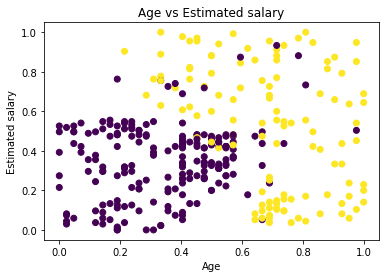

In [11]:
#visualization of training data
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],c=y_train)

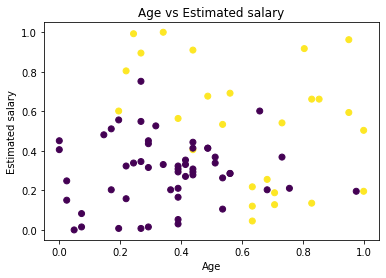

In [13]:
#visualization of testing data(Actual)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_test)

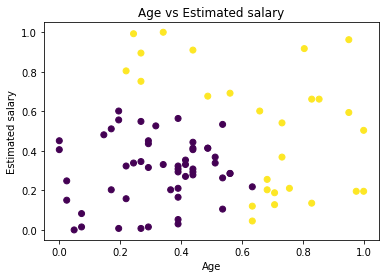

In [14]:
#visualization of testing data(Predicted)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_pred)